# Q-Score

In [22]:
%load_ext autoreload
%autoreload 2

from iqm.benchmarks.coherence.coherence import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Choose (or define) a backend

In [32]:
from iqm.qiskit_iqm import IQMProvider
from qiskit import QuantumCircuit
import numpy as np
import os
from iqm.benchmarks.readout_mitigation import apply_readout_error_mitigation

In [37]:
# Input your Resonance token
token = "5ssyU+3FVyIG5j6zVIyfQtC9INq8XbgNfVQMpeviOaQGhJaBYHt24YAAsFzERsSt"
os.environ["IQM_TOKEN"] = token

QPU = "sirius"  # Options for the crystal QPUs are: garnet, pyrite, emerald

if QPU == "emerald":
    iqm_server_url = 'https://cocos.resonance.meetiqm.com/' + QPU + ":timeslot"
else:
    iqm_server_url = 'https://cocos.resonance.meetiqm.com/' + QPU

provider = IQMProvider(iqm_server_url)
backend = provider.get_backend()

/opt/anaconda3/envs/iqm-benchmarks/lib/python3.11/site-packages/iqm/iqm_client/iqm_client.py:142: UserWarning: Your IQM Client version 27.1.0 was built for a different version of IQM Server. You might encounter issues. For the best experience, consider using a version of IQM Client that satisfies 29.2.0 <= iqm-client < 30.0.
  warnings.warn(version_incompatibility_msg)


In [34]:
# from iqm.qiskit_iqm.fake_backends import IQMFakeAdonis

# backend = IQMFakeAdonis()

## Set IQM Token if using Resonance.

## Qscore Configuration

In [38]:
EXAMPLE_T1 = CoherenceConfiguration(
    custom_qubits_array= [2],
    delays = list(np.linspace(0, 100e-6, 150)),
    qiskit_optim_level = 3,
    optimize_sqg = True,
    qpu_topology = "crystal",
    coherence_exp = "t1",
    shots=2000,
    REM=False,
    )

## Run the experiment

In [39]:
benchmark_t1 = CoherenceBenchmark(backend, EXAMPLE_T1)
run0_t1 = benchmark_t1.run()
result = benchmark_t1.analyze()

/opt/anaconda3/envs/iqm-benchmarks/lib/python3.11/site-packages/iqm/qiskit_iqm/iqm_provider.py:171: UserWarning: Unknown backend option(s): {'calibration_set_id': None}
  warnings.warn(f"Unknown backend option(s): {unknown_options}")
2025-07-08 10:34:05,132 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-07-08 10:36:17,022 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-07-08 10:36:17,032 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-07-08 10:36:17,043 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-07-08 10:36:17,054 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-07-08 10:36:17,076 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-07-08 10:36:17,089 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-07-08 10:36:17,108 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-07-08 10:36:17,131 - iqm.benchmarks.logging_config - INFO - Retri

[{'0': 109, '1': 1891}, {'0': 194, '1': 1806}, {'0': 263, '1': 1737}, {'0': 349, '1': 1651}, {'0': 437, '1': 1563}, {'0': 524, '1': 1476}, {'0': 585, '1': 1415}, {'0': 645, '1': 1355}, {'0': 729, '1': 1271}, {'0': 836, '1': 1164}, {'0': 878, '1': 1122}, {'0': 914, '1': 1086}, {'0': 906, '1': 1094}, {'0': 1014, '1': 986}, {'0': 1065, '1': 935}, {'0': 1101, '1': 899}, {'0': 1157, '1': 843}, {'0': 1171, '1': 829}, {'0': 1197, '1': 803}, {'0': 1257, '1': 743}, {'0': 1272, '1': 728}, {'0': 1314, '1': 686}, {'0': 1349, '1': 651}, {'0': 1346, '1': 654}, {'0': 1432, '1': 568}, {'0': 1426, '1': 574}, {'0': 1456, '1': 544}, {'0': 1488, '1': 512}, {'0': 1520, '1': 480}, {'0': 1476, '1': 524}, {'0': 1516, '1': 484}, {'0': 1582, '1': 418}, {'0': 1591, '1': 409}, {'0': 1642, '1': 358}, {'0': 1629, '1': 371}, {'0': 1634, '1': 366}, {'0': 1637, '1': 363}, {'0': 1658, '1': 342}, {'0': 1666, '1': 334}, {'0': 1685, '1': 315}, {'0': 1665, '1': 335}, {'0': 1740, '1': 260}, {'0': 1702, '1': 298}, {'0': 1743

IndexError: list index out of range

## Perform Analysis

In [ ]:
result.observations

[BenchmarkObservation(name='T1', value=3.509770178810308e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=0), uncertainty=None),
 BenchmarkObservation(name='T1', value=3.862223759359475e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=1), uncertainty=None),
 BenchmarkObservation(name='T1', value=3.2425382737148136e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=None),
 BenchmarkObservation(name='T1', value=3.4499219062283094e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=None),
 BenchmarkObservation(name='T1', value=2.6470544406668514e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=4), uncertainty=None)]

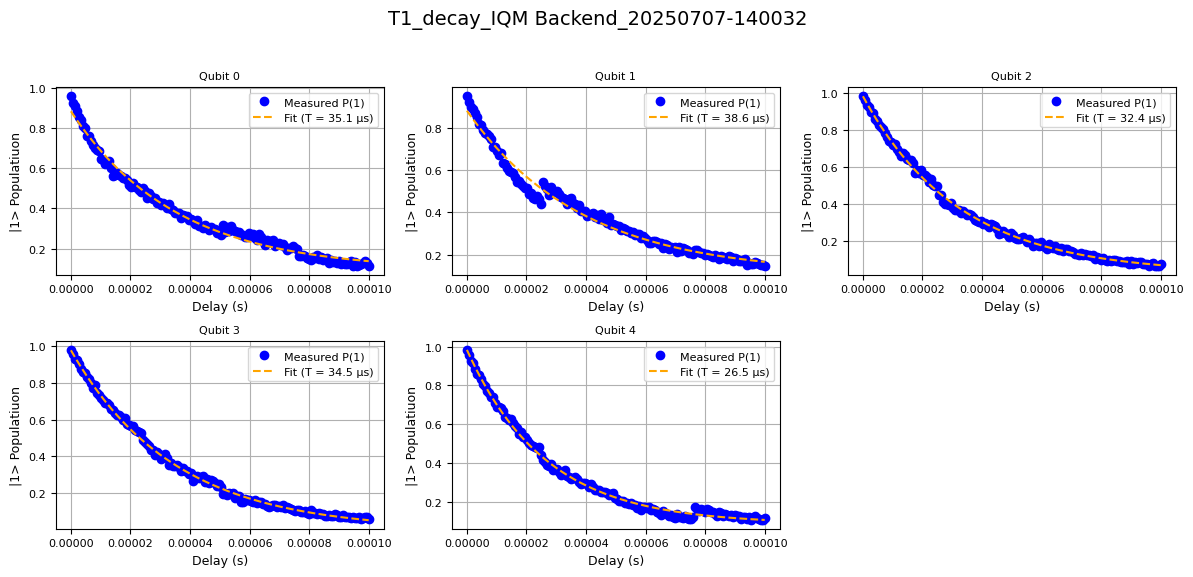

In [ ]:
result.plot_all()